## Welcome

This is material for the **Difference-in-Differences** chapter in Scott Cunningham's book, [Causal Inference: The Mixtape.](https://mixtape.scunning.com/)


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

import plotnine as p

In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# read data
def read_data(file):
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

In [40]:
abortion = read_data('abortion.dta')
abortion = abortion[~pd.isnull(abortion.lnr)]
abortion_bf15 = abortion[abortion.bf15==1]

reg = sm.OLS.from_formula("""lnr ~ C(repeal)*C(year) + C(fip) + acc + ir + pi + alcohol + crack + poverty + income + ur""",
            data = abortion_bf15, freq_weights=abortion_bf15['totpop']).fit(
            cov_type='cluster', cov_kwds={'groups': abortion_bf15['fip'].values})

In [41]:
reg.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 89, but rank is 27


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnr   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     172.3
Date:                Wed, 10 Mar 2021   Prob (F-statistic):           1.30e-40
Time:                        18:47:48   Log-Likelihood:                -193.93
No. Observations:                 737   AIC:                             565.9
Df Residuals:                     648   BIC:                             975.5
Df Model:                          88                                         
Covariance Type:              cluster                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              7.3038      0.726     10.062      0.000       5.881       8.726
C(repeal)[T.1.0]                      -1.2671      0.282     -4.499      0.000      -1.819      -0.715
C(year)[T.1986.0]                     -0.0229      0.058     -0.397      0.691      -0.136       0.090
C(year)[T.1987.0]                     -0.1612      0.070     -2.311      0.021      -0.298      -0.024
C(year)[T.1988.0]                     -0.0690      0.094     -0.733      0.463      -0.253       0.115
C(year)[T.1989.0]                     -0.1014      0.117     -0.867      0.386      -0.331       0.128
C(year)[T.1990.0]                     -0.2153      0.133     -1.618      0.106      -0.476       0.046
C(year)[T.1991.0]                     -0.2629      0.136     -1.940      0.052      -0.528       0.003
C(year)[T.1992.0]                     -0.4660      0.164     -2.847      0.004      -0.787      -0.145
C(year)[T.1993.0]                     -0.5735      0.176     -3.258      0.001      -0.919      -0.229
C(year)[T.1994.0]                     -0.6423      0.217     -2.956      0.003      -1.068      -0.216
C(year)[T.1995.0]                     -0.8025      0.234     -3.423      0.001      -1.262      -0.343
C(year)[T.1996.0]                     -1.1184      0.266     -4.197      0.000      -1.641      -0.596
C(year)[T.1997.0]                     -1.1328      0.280     -4.042      0.000      -1.682      -0.584
C(year)[T.1998.0]                     -1.0992      0.333     -3.300      0.001      -1.752      -0.446
C(year)[T.1999.0]                     -1.1324      0.347     -3.260      0.001      -1.813      -0.452
C(year)[T.2000.0]                     -1.3389      0.408     -3.281      0.001      -2.139      -0.539
C(fip)[T.2.0]                         -0.6991      0.197     -3.555      0.000      -1.084      -0.314
C(fip)[T.4.0]                         -0.5558      0.200     -2.780      0.005      -0.948      -0.164
C(fip)[T.5.0]                          0.1027      0.048      2.132      0.033       0.008       0.197
C(fip)[T.6.0]                          0.1596      0.074      2.163      0.031       0.015       0.304
C(fip)[T.8.0]                         -0.6853      0.263     -2.608      0.009      -1.200      -0.170
C(fip)[T.9.0]                         -1.0868      0.381     -2.849      0.004      -1.834      -0.339
C(fip)[T.10.0]                        -0.4074      0.305     -1.334      0.182      -1.006       0.191
C(fip)[T.11.0]                        -1.7034      0.652     -2.614      0.009      -2.981      -0.426
C(fip)[T.12.0]                        -0.8086      0.243     -3.325      0.001      -1.285      -0.332
C(fip)[T.13.0]                        -0.4840      0.124     -3.905      0.000      -0.727      

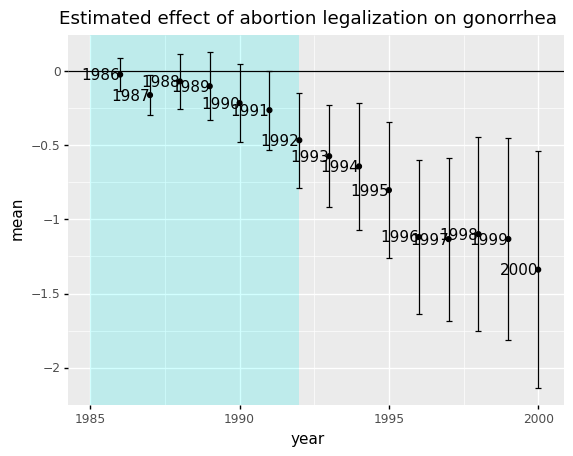

<ggplot: (8778670994098)>

In [42]:
abortion_plot = pd.DataFrame({'sd': reg.bse[2:17],
             'mean': reg.params.values[2:17],
             'year':np.arange(1986, 2001)})
abortion_plot['lb'] = abortion_plot['mean'] - abortion_plot['sd']*1.96
abortion_plot['ub'] = abortion_plot['mean'] + abortion_plot['sd']*1.96

p.ggplot(abortion_plot, p.aes(x = 'year', y = 'mean')) + \
    p.geom_rect(p.aes(xmin=1985, xmax=1992, ymin=-np.inf, ymax=np.inf), fill = "cyan", alpha = 0.01)+\
    p.geom_point()+\
    p.geom_text(p.aes(label = 'year'), ha='right')+\
    p.geom_hline(yintercept = 0) +\
    p.geom_errorbar(p.aes(ymin = 'lb', ymax = 'ub'), width = 0.2,
                position = p.position_dodge(0.05)) +\
    p.labs(title= "Estimated effect of abortion legalization on gonorrhea")

### Note on results

Python and R implementations produce different answers. Design matrix is rank deficient, `lm and lm_robust` have a convergence issue. `statsmodels` is more robust to rank deficiency.

#### Questions
- Describe in your own words the testable predictions from the roll out of repeal versus Roe in the population?  In other words, describe the behavior of the DD coefficients under this regression.  
- Do we find evidence consistent with this in our DD analysis?  List all the evidence for and against the hypothesis in this analysis. 
- Does it appear that there was an effect in the period where Roe has not fully caught up?




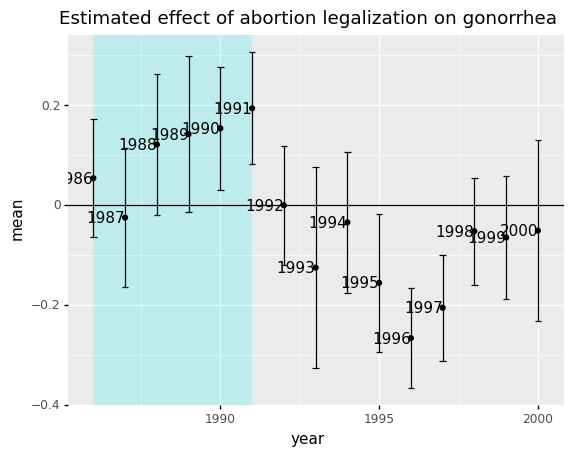

<ggplot: (8778698156255)>

In [10]:
abortion = read_data('abortion.dta')
abortion = abortion[~pd.isnull(abortion.lnr)]

abortion['yr'] = 0
abortion.loc[(abortion.younger==1) & (abortion.repeal==1), 'yr'] = 1

abortion['wm'] = 0
abortion.loc[(abortion.wht==1) & (abortion.male==1), 'wm'] = 1

abortion['wf'] = 0
abortion.loc[(abortion.wht==1) & (abortion.male==0), 'wf'] = 1

abortion['bm'] = 0
abortion.loc[(abortion.wht==0) & (abortion.male==1), 'bm'] = 1

abortion['bf'] = 0
abortion.loc[(abortion.wht==0) & (abortion.male==0), 'bf'] = 1


abortion_filt = abortion[(abortion.bf==1) & (abortion.age.isin([15,25]))]

reg = sm.OLS.from_formula("""lnr ~ C(repeal)*C(year) + C(younger)*C(repeal) + C(younger)*C(year) + 
C(yr)*C(year) + C(fip)*t + acc + ir + pi + alcohol + crack + poverty + income + ur""",
            data = abortion_filt, freq_weights = abortion_filt['totpop']).fit(
            cov_type='cluster', cov_kwds={'groups': abortion_filt['fip']})

abortion_plot = pd.DataFrame({'sd': reg.bse[2:17],
             'mean': reg.params.values[2:17],
             'year':np.arange(1986, 2001)})
abortion_plot['lb'] = abortion_plot['mean'] - abortion_plot['sd']*1.96
abortion_plot['ub'] = abortion_plot['mean'] + abortion_plot['sd']*1.96

p.ggplot(abortion_plot, p.aes(x = 'year', y = 'mean')) + \
    p.geom_rect(p.aes(xmin=1986, xmax=1991, ymin=-np.inf, ymax=np.inf), fill = "cyan", alpha = 0.01)+\
    p.geom_point()+\
    p.geom_text(p.aes(label = 'year'), ha='right')+\
    p.geom_hline(yintercept = 0) +\
    p.geom_errorbar(p.aes(ymin = 'lb', ymax = 'ub'), width = 0.2,
                position = p.position_dodge(0.05)) +\
    p.labs(title= "Estimated effect of abortion legalization on gonorrhea")

### Note on results

Python and R implementations produce different answers. Design matrix is rank deficient, `lm and lm_robust` have a convergence issue. `statsmodels` uses different methods with this problem: https://www.statsmodels.org/stable/pitfalls.html?highlight=rank%20defi#rank-deficient-exog-perfect-multicollinearity

#### Questions
- Why did we implement a triple difference?  What problems does this solve and to what degree do you feel it is a necessary check?
- Describe the evidence for and against the abortion selection hypothesis when using triple difference?  How is it consistent with our DD and how is it not?


In [43]:
abortion_filt = abortion[(abortion.race == 2) & (abortion.sex == 2) & (abortion.age == 20)]

reg = sm.OLS.from_formula("""lnr ~ C(repeal)*C(year) + C(fip) + acc + ir + pi + alcohol+ crack + poverty+ income+ ur""",
            data = abortion_filt, freq_weights = abortion_filt['totpop']).fit(
            cov_type='cluster', cov_kwds={'groups': abortion_filt['fip']})
reg.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 89, but rank is 26


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnr   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     201.1
Date:                Wed, 10 Mar 2021   Prob (F-statistic):           4.30e-42
Time:                        18:49:23   Log-Likelihood:                -191.07
No. Observations:                 733   AIC:                             558.1
Df Residuals:                     645   BIC:                             962.7
Df Model:                          87                                         
Covariance Type:              cluster                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              6.6023      0.631     10.456      0.000       5.365       7.840
C(repeal)[T.1.0]                      -1.6162      0.278     -5.818      0.000      -2.161      -1.072
C(year)[T.1986.0]                     -0.0142      0.055     -0.256      0.798      -0.122       0.094
C(year)[T.1987.0]                     -0.1737      0.075     -2.327      0.020      -0.320      -0.027
C(year)[T.1988.0]                     -0.1441      0.095     -1.513      0.130      -0.331       0.043
C(year)[T.1989.0]                     -0.1632      0.134     -1.218      0.223      -0.426       0.099
C(year)[T.1990.0]                     -0.3172      0.150     -2.109      0.035      -0.612      -0.022
C(year)[T.1991.0]                     -0.3716      0.165     -2.246      0.025      -0.696      -0.047
C(year)[T.1992.0]                     -0.5930      0.168     -3.539      0.000      -0.921      -0.265
C(year)[T.1993.0]                     -0.7824      0.195     -4.007      0.000      -1.165      -0.400
C(year)[T.1994.0]                     -0.7746      0.225     -3.439      0.001      -1.216      -0.333
C(year)[T.1995.0]                     -0.9350      0.242     -3.856      0.000      -1.410      -0.460
C(year)[T.1996.0]                     -1.1844      0.280     -4.228      0.000      -1.733      -0.635
C(year)[T.1997.0]                     -1.2330      0.314     -3.925      0.000      -1.849      -0.617
C(year)[T.1998.0]                     -1.1723      0.336     -3.491      0.000      -1.831      -0.514
C(year)[T.1999.0]                     -1.2225      0.389     -3.143      0.002      -1.985      -0.460
C(year)[T.2000.0]                     -1.4156      0.446     -3.177      0.001      -2.289      -0.542
C(fip)[T.2.0]                         -0.8977      0.194     -4.635      0.000      -1.277      -0.518
C(fip)[T.4.0]                         -0.9035      0.168     -5.381      0.000      -1.233      -0.574
C(fip)[T.5.0]                          0.0064      0.045      0.144      0.886      -0.081       0.094
C(fip)[T.6.0]                          0.0840      0.111      0.755      0.450      -0.134       0.302
C(fip)[T.8.0]                         -0.9849      0.241     -4.080      0.000      -1.458      -0.512
C(fip)[T.9.0]                         -1.3984      0.382     -3.664      0.000      -2.146      -0.650
C(fip)[T.10.0]                        -0.9297      0.285     -3.261      0.001      -1.488      -0.371
C(fip)[T.11.0]                        -2.2143      0.583     -3.795      0.000      -3.358      -1.071
C(fip)[T.12.0]                        -0.9462      0.225     -4.211      0.000      -1.387      -0.506
C(fip)[T.13.0]                        -0.4691      0.118     -3.984      0.000      -0.700      

In [8]:
abortion_filt = abortion[(abortion.bf == 1) & abortion.age.isin([20,25])]

regddd = sm.OLS.from_formula("""lnr ~ C(repeal)*C(year) + acc + ir + pi + alcohol + crack + poverty + income + ur""",
            data = abortion_filt, freq_weights = abortion_filt['totpop']).fit(
            cov_type='cluster', cov_kwds={'groups': abortion_filt['fip']})
regddd.summary()


/Users/tcaputo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 39, but rank is 27


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnr   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     60.98
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           1.21e-29
Time:                        13:30:28   Log-Likelihood:                -1512.5
No. Observations:                1435   AIC:                             3103.
Df Residuals:                    1396   BIC:                             3309.
Df Model:                          38                                         
Covariance Type:              cluster                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              7.6205      0.964      7.908      0.000       5.732       9.509
C(repeal)[T.1.0]                      -0.5738      0.395     -1.454      0.146      -1.347       0.200
C(year)[T.1986.0]                     -0.0373      0.084     -0.446      0.656      -0.202       0.127
C(year)[T.1987.0]                     -0.1494      0.103     -1.452      0.146      -0.351       0.052
C(year)[T.1988.0]                     -0.1116      0.121     -0.920      0.357      -0.349       0.126
C(year)[T.1989.0]                     -0.1295      0.142     -0.912      0.362      -0.408       0.149
C(year)[T.1990.0]                     -0.2513      0.176     -1.426      0.154      -0.597       0.094
C(year)[T.1991.0]                     -0.3977      0.157     -2.538      0.011      -0.705      -0.091
C(year)[T.1992.0]                     -0.5652      0.174     -3.250      0.001      -0.906      -0.224
C(year)[T.1993.0]                     -0.8746      0.214     -4.080      0.000      -1.295      -0.454
C(year)[T.1994.0]                     -0.8592      0.229     -3.756      0.000      -1.307      -0.411
C(year)[T.1995.0]                     -1.0074      0.233     -4.318      0.000      -1.465      -0.550
C(year)[T.1996.0]                     -1.1561      0.259     -4.459      0.000      -1.664      -0.648
C(year)[T.1997.0]                     -1.2460      0.294     -4.231      0.000      -1.823      -0.669
C(year)[T.1998.0]                     -1.0992      0.325     -3.382      0.001      -1.736      -0.462
C(year)[T.1999.0]                     -1.1717      0.347     -3.381      0.001      -1.851      -0.492
C(year)[T.2000.0]                     -1.3523      0.425     -3.183      0.001      -2.185      -0.520
C(repeal)[T.1.0]:C(year)[T.1986.0]     0.1810      0.109      1.659      0.097      -0.033       0.395
C(repeal)[T.1.0]:C(year)[T.1987.0]    -0.0042      0.166     -0.026      0.980      -0.329       0.321
C(repeal)[T.1.0]:C(year)[T.1988.0]    -0.2271      0.216     -1.053      0.292      -0.650       0.195
C(repeal)[T.1.0]:C(year)[T.1989.0]    -0.2291      0.178     -1.285      0.199      -0.579       0.120
C(repeal)[T.1.0]:C(year)[T.1990.0]    -0.3368      0.159     -2.119      0.034      -0.648      -0.025
C(repeal)[T.1.0]:C(year)[T.1991.0]     0.0718      0.360      0.199      0.842      -0.635       0.778
C(repeal)[T.1.0]:C(year)[T.1992.0]    -0.1311      0.336     -0.390      0.696      -0.789       0.527
C(repeal)[T.1.0]:C(year)[T.1993.0]     0.2365      0.423      0.559      0.576      -0.593       1.066
C(repeal)[T.1.0]:C(year)[T.1994.0]     0.1473      0.409      0.360      0.719      -0.654       0.949
C(repeal)[T.1.0]:C(year)[T.1995.0]     0.0381      0.369      0.103      0.918      -0.685      

#### Questions
- Why did we suggest that conducting this additional analysis not conducted in the original study?
- How convinced are you now of the abortion selection hypothesis?  Why/why not?
- Could you have concluded this had you not exploited all of the testable predictions of the original table showing roll out across cohort and time?  
- How important was our ``model`` to forming testable predictions and falsifications? 

## Cheng and Hoekstra (2013)

In [44]:
castle = read_data('castle.dta')
crime1 = ("jhcitizen_c", "jhpolice_c", 
            "murder", "homicide", 
            "robbery", "assault", "burglary",
            "larceny", "motor", "robbery_gun_r")
demo = ("emo", "blackm_15_24", "whitem_15_24", 
          "blackm_25_44", "whitem_25_44")

# variables dropped to prevent colinearity
dropped_vars = ("r20004", "r20014",
                  "r20024", "r20034",
                  "r20044", "r20054",
                  "r20064", "r20074",
                  "r20084", "r20094",
                  "r20101", "r20102", "r20103",
                  "r20104", "trend_9", "trend_46",
                  "trend_49", "trend_50", "trend_51")
cols = pd.Series(castle.columns)
trend_cols = set(cols[cols.str.contains('^trend')])
lintrend = castle[trend_cols - set(dropped_vars)]

In [45]:
region = set(cols[cols.str.contains('^r20')])
lintrend = set(cols[cols.str.contains('^trend')])

exocrime = ("l_lacerny", "l_motor")
spending = ("l_exp_subsidy", "l_exp_pubwelfare")
xvar = (
  "blackm_15_24", "whitem_15_24", "blackm_25_44", "whitem_25_44",
  "l_exp_subsidy", "l_exp_pubwelfare",
  "l_police", "unemployrt", "poverty", 
  "l_income", "l_prisoner", "l_lagprisoner"
)

law = ("cdl")

dd_formula = "l_homicide ~ {} + {} + {} + post + C(year) + C(sid)".format(
    "+".join(xvar), 
    "+".join(region),
    "+".join(lintrend))

#Fixed effect regression using post as treatment variable 
dd_reg = sm.OLS.from_formula(dd_formula,
            data = castle, freq_weights = castle['popwt']).fit(cov_type='cluster', cov_kwds={'groups':castle['sid']})
dd_reg.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 167, but rank is 48


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             l_homicide   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     1313.
Date:                Wed, 10 Mar 2021   Prob (F-statistic):           1.44e-63
Time:                        18:49:29   Log-Likelihood:                 351.46
No. Observations:                 550   AIC:                            -404.9
Df Residuals:                     401   BIC:                             237.3
Df Model:                         148                                         
Covariance Type:              cluster                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.2406      3.995      1.812      0.070      -0.589      15.071
C(year)[T.2001]      0.8388      0.465      1.803      0.071      -0.073       1.751
C(year)[T.2002]      0.6755      0.386      1.752      0.080      -0.080       1.431
C(year)[T.2003]      0.5801      0.316      1.835      0.067      -0.040       1.200
C(year)[T.2004]      0.4553      0.244      1.865      0.062      -0.023       0.934
C(year)[T.2005]      0.3475      0.172      2.015      0.044       0.009       0.685
C(year)[T.2006]      0.2448      0.106      2.312      0.021       0.037       0.452
C(year)[T.2007]      0.0931      0.031      2.987      0.003       0.032       0.154
C(year)[T.2008]     -0.0802      0.058     -1.378      0.168      -0.194       0.034
C(year)[T.2009]     -0.2938      0.149     -1.975      0.048      -0.585      -0.002
C(year)[T.2010]     -0.4554      0.238     -1.910      0.056      -0.923       0.012
C(sid)[T.2]          1.2878      0.433      2.975      0.003       0.439       2.136
C(sid)[T.3]          1.5196      0.352      4.313      0.000       0.829       2.210
C(sid)[T.4]         -0.1818      0.189     -0.964      0.335      -0.551       0.188
C(sid)[T.5]          1.3348      0.323      4.130      0.000       0.701       1.968
C(sid)[T.6]          0.5522      0.337      1.636      0.102      -0.109       1.214
C(sid)[T.7]          1.4516      0.755      1.923      0.055      -0.028       2.931
C(sid)[T.8]         -0.9708      0.243     -4.000      0.000      -1.446      -0.495
C(sid)[T.10]        -0.4353      0.177     -2.460      0.014      -0.782      -0.089
C(sid)[T.11]         0.4953      0.310      1.596      0.111      -0.113       1.104
C(sid)[T.12]         0.3626      0.398      0.910      0.363      -0.418       1.144
C(sid)[T.13]        -2.6831      1.543     -1.739      0.082      -5.707       0.341
C(sid)[T.14]         1.6046      0.399      4.017      0.000       0.822       2.387
C(sid)[T.15]         1.2927      0.434      2.978      0.003       0.442       2.143
C(sid)[T.16]        -0.2032      0.385     -0.528      0.597      -0.957       0.551
C(sid)[T.17]         0.7915      0.284      2.785      0.005       0.235       1.348
C(sid)[T.18]        -1.0180      0.206     -4.947      0.000      -1.421      -0.615
C(sid)[T.19]         1.1794      0.289      4.086      0.000       0.614       1.745
C(sid)[T.20]        -2.4746      0.995     -2.487      0.013      -4.425      -0.525
C(sid)[T.21]         0.5090      0.308      1.653      0.098      -0.095       1.113
C(sid)[T.22]         0.4280      0.542      0.790      0.429      -0.634       1.490
C(sid)[T.23]         1.6261      0.457      3.556      0.000       0.730       2.522
C(sid)[T.24]        -0.1563      0.455     -0.344      0.731      -1.048       0.735
C(sid)[T.25]         0.

#### QUESTIONS

- What effect does this analysis say reforming castle doctrine laws has on homicides?
- What are the key parts of these legislative reforms that you think may be causing this result?
- Explain what SUTVA requires in order for these estimates to be causal?
- Assume there are spillovers to neighboring states created by castle doctrine reforms.  Does that imply that Cheng and Hoekstra's result is too large or too small?  Why/why not?


In [47]:
castle['time_til'] = castle['year'] - castle['treatment_date']
castle = castle[~pd.isnull(castle.time_til)]
formula = "l_homicide ~ {} + C(time_til) + C(year) + C(sid)".format("+".join(region))

event_study_formula = sm.OLS.from_formula(formula,
            data = castle, 
            freq_weights = castle['popwt']).fit(cov_type='cluster', cov_kwds={'groups':castle['sid']})
event_study_formula.summary()

<ipython-input-47-6c6e3fa8f2c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 88, but rank is 20


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             l_homicide   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                -4.413e+13
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               1.00
Time:                        18:49:59   Log-Likelihood:                 88.377
No. Observations:                 231   AIC:                            -48.75
Df Residuals:                     167   BIC:                             171.6
Df Model:                          63                                         
Covariance Type:              cluster                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.4335      0.028     50.373      0.000       1.378       1.489
C(time_til)[T.-8.0]     0.0251      0.225      0.112      0.911      -0.417       0.467
C(time_til)[T.-7.0]    -0.0308      0.172     -0.179      0.858      -0.368       0.306
C(time_til)[T.-6.0]     0.2006      0.076      2.630      0.009       0.051       0.350
C(time_til)[T.-5.0]     0.1677      0.040      4.187      0.000       0.089       0.246
C(time_til)[T.-4.0]     0.1493      0.072      2.064      0.039       0.008       0.291
C(time_til)[T.-3.0]     0.1816      0.051      3.578      0.000       0.082       0.281
C(time_til)[T.-2.0]     0.1777      0.059      3.001      0.003       0.062       0.294
C(time_til)[T.-1.0]     0.0910      0.059      1.532      0.125      -0.025       0.207
C(time_til)[T.0.0]      0.2041      0.081      2.509      0.012       0.045       0.364
C(time_til)[T.1.0]      0.1575      0.060      2.645      0.008       0.041       0.274
C(time_til)[T.2.0]      0.2202      0.065      3.391      0.001       0.093       0.347
C(time_til)[T.3.0]      0.1171      0.065      1.812      0.070      -0.010       0.244
C(time_til)[T.4.0]      0.0682      0.083      0.823      0.410      -0.094       0.230
C(time_til)[T.5.0]      0.1440      0.053      2.738      0.006       0.041       0.247
C(year)[T.2001]         0.1401      0.058      2.413      0.016       0.026       0.254
C(year)[T.2002]         0.0441      0.037      1.179      0.238      -0.029       0.118
C(year)[T.2003]         0.1269      0.026      4.832      0.000       0.075       0.178
C(year)[T.2004]         0.1348      0.042      3.191      0.001       0.052       0.218
C(year)[T.2005]         0.1113      0.063      1.754      0.079      -0.013       0.236
C(year)[T.2006]         0.1687      0.058      2.927      0.003       0.056       0.282
C(year)[T.2007]         0.1696      0.069      2.460      0.014       0.035       0.305
C(year)[T.2008]         0.1001      0.055      1.810      0.070      -0.008       0.209
C(year)[T.2009]         0.1079      0.052      2.083      0.037       0.006       0.209
C(year)[T.2010]         0.0697      0.044      1.596      0.110      -0.016       0.155
C(sid)[T.2]            -0.0488      0.009     -5.344      0.000      -0.067      -0.031
C(sid)[T.3]             0.3399      0.009     37.205      0.000       0.322       0.358
C(sid)[T.10]           -0.2383      0.009    -25.343      0.000      -0.257      -0.220
C(sid)[T.11]           -0.0477   5.97e-10     -8e+07      0.000      -0.048      -0.048
C(sid)[T.15]            0.1514      0.004     37.823      0.000       0.144       0.159
C(sid)[T.17]           -0.1372      0.004    -34.291      0.000      -0.145      -0.129
C(sid)[T.18]           -0.4369   6.97e-10  -6.27e+08      0.000      -0.437      -0.437
C(s

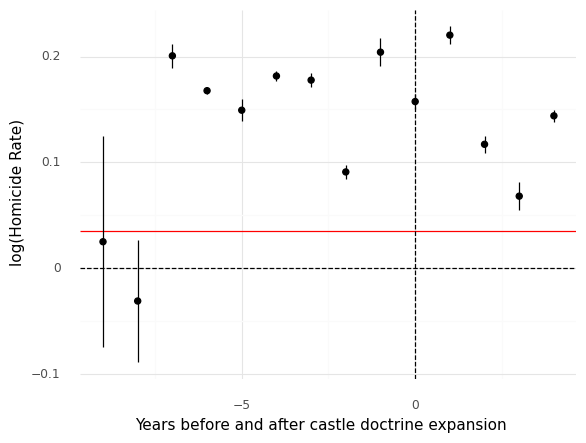

<ggplot: (8778671414794)>

In [48]:
# grab the clustered standard errors
# and average coefficient estimates
# from the regression, label them accordingly
# add a zero'th lag for plotting purposes

leadslags_plot = pd.DataFrame({
    'sd' : np.diag(event_study_formula.cov_params().values)[1:15],
    'mean':  event_study_formula.params[1:15],
    'label': np.arange(-9, 5)}) 

leadslags_plot['lb'] = leadslags_plot['mean'] - leadslags_plot['sd']*1.96
leadslags_plot['ub'] = leadslags_plot['mean'] + leadslags_plot['sd']*1.96

# This version has a point-range at each
# estimated lead or lag
# comes down to stylistic preference at the
# end of the day!
p.ggplot(leadslags_plot, p.aes(x = 'label', y = 'mean',
             ymin = 'lb', 
             ymax = 'ub')) +\
    p.geom_hline(yintercept = 0.035169444, color = "red") +\
    p.geom_pointrange() +\
    p.theme_minimal() +\
    p.xlab("Years before and after castle doctrine expansion") +\
    p.ylab("log(Homicide Rate)") +\
    p.geom_hline(yintercept = 0,
             linetype = "dashed") +\
    p.geom_vline(xintercept = 0,
             linetype = "dashed")


#### QUESTIONS
- Put into your own words why we estimated the pre-treatment leads?
- Put into your own words what we expected to find?
- How convinced are you by this analysis that parallel trends was likely to hold in Cheng and Hoekstra's data? 
